#### 1)

In [1]:
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

import re
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

In [2]:
df_train = pd.read_csv("https://raw.githubusercontent.com/Shreyas3108/Titanic-EDA-and-Survival-prediction/master/train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/Shreyas3108/Titanic-EDA-and-Survival-prediction/master/test.csv")

In [3]:
data = pd.concat([df_train, df_test])

In [4]:
data.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


#### 2)

In [6]:
data['Survived'] =  data['Survived'].dropna()
data['Survived'].value_counts()

0.0    804
1.0    505
Name: Survived, dtype: int64

#### 3)

In [7]:
data['Has_Cabin'] = ~data.Cabin.isnull()
data.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Has_Cabin
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,False
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,True
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,False
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,True
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,False


#### 4)

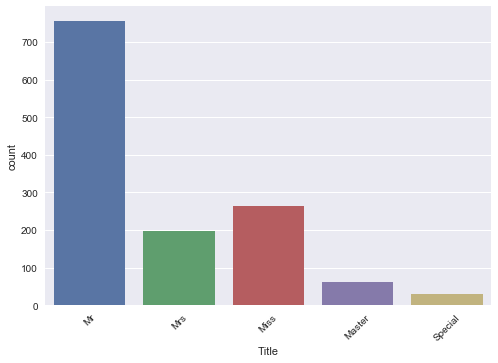

In [8]:
data['Title'] = data.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
data['Title'] = data['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
data['Title'] = data['Title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                                            'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Special')

## optional
sns.countplot(x='Title', data=data);
plt.xticks(rotation=45);

#### 5)

In [9]:
data['Age'] = data.Age.fillna(data.Age.median())
data['Fare'] = data.Fare.fillna(data.Fare.median())
data['Embarked'] = data['Embarked'].fillna('S')

data.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Has_Cabin,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,False,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,True,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,False,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,True,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,False,Mr


#### 6)

In [10]:
data['Categorical_age'] = pd.qcut(data.Age, q=4, labels=False )
data['Categorical_fare']= pd.qcut(data.Fare, q=4, labels=False)
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Has_Cabin,Title,Categorical_age,Categorical_fare
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,False,Mr,0,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,True,Mrs,3,3
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,False,Miss,1,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,True,Mrs,2,3
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,False,Mr,2,1


#### 7)

In [11]:
#data = data.drop(['Cabin', 'Name', 'Passengerid', 'Ticket','Age', 'Fare', 'SibSp', 'Parch'], axis=1, inplace=True)
data.drop(['Cabin', 'Name', 'PassengerId', 'Ticket', 'Age', 'Fare', 'SibSp', 'Parch'], axis=1, inplace=True)
data.head()

,Embarked,Pclass,Sex,Survived,Has_Cabin,Title,Categorical_age,Categorical_fare
0,S,3,male,0.0,False,Mr,0,0
1,C,1,female,1.0,True,Mrs,3,3
2,S,3,female,1.0,False,Miss,1,1
3,S,1,female,1.0,True,Mrs,2,3
4,S,3,male,0.0,False,Mr,2,1


#### 8)

In [12]:
df = pd.get_dummies(data, drop_first=True)
df.head()

,Pclass,Survived,Has_Cabin,Categorical_age,Categorical_fare,Embarked_Q,Embarked_S,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Special
0,3,0.0,False,0,0,0,1,1,0,1,0,0
1,1,1.0,True,3,3,0,0,0,0,0,1,0
2,3,1.0,False,1,1,0,1,0,1,0,0,0
3,1,1.0,True,2,3,0,1,0,0,0,1,0
4,3,0.0,False,2,1,0,1,1,0,1,0,0


#### 9)

In [13]:
X = df.drop(['Survived'], axis = 1).values
y = df['Survived'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#### 10)

In [15]:
model = linear_model.LogisticRegression()

In [16]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
predict = model.predict(X_test)

#### 11)

In [18]:
accuracy_score = model.score(X_test, y_test)
print("The accuracy score is : {}".format(accuracy_score)) 

The accuracy score is : 0.697201017812
